In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set()


import matplotlib.pyplot as plt
%matplotlib inline

#plt.style.use('ggplot')
# commented out as I liked the other colors better

# used different plotting libraries based on what I found to be the easiest

In [2]:
! dir data

# changed for windows


 Volume in drive C is Windows
 Volume Serial Number is FC6A-DCD3

 Directory of C:\Users\Pulsar\Desktop\2022-fall-data-science\Week-08-Data-Visualization\data

10/28/2022  07:02 PM    <DIR>          .
10/29/2022  06:18 PM    <DIR>          ..
10/28/2022  07:02 PM         2,336,532 budget-sample.csv
10/28/2022  07:02 PM           353,004 BX-Police.csv
10/28/2022  07:02 PM             4,613 Iris.csv
10/28/2022  07:02 PM               476 Sales.csv
10/28/2022  07:02 PM            20,258 Stocks.csv
               5 File(s)      2,714,883 bytes
               2 Dir(s)  790,551,605,248 bytes free


# Using budget-sample.csv
* Plot a histogram of the base_salary.  Write one sentence about what this tells you about base salaries.
* Make a boxplot of base salaries, what does this tell you about base salaries?
* Make a boxplot of base salaries per (or by) work_location_borough, what does this tell you about the difference in working in each location?
* Make a plot visualizing the difference average base salaries based on agency_name.  Who would you want to work for based on this information?
<br><br>
* __Tell me something new, cool, and interesting about this data__


In [3]:
df = pd.read_csv("data/budget-sample.csv")

In [4]:
df.head()

,fiscal_year,payroll_number,agency_name,last_name,first_name,mid_init,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay
0,2020,826,DEPT OF ENVIRONMENT PROTECTION,BROWN,TRACYANN,NaN,02/23/2004,QUEENS,COMMUNITY ASSISTANT,ACTIVE,37816.0,per Annum,2080.0,37235.48,11.00,206.04,1309.56
1,2020,56,POLICE DEPARTMENT,WONG,CHIWAI,NaN,07/08/2015,BROOKLYN,POLICE OFFICER,ACTIVE,63125.0,per Annum,2080.0,60758.85,343.13,10842.71,10325.31
2,2020,742,DEPT OF ED PEDAGOGICAL,FARRELL,TARA,E,09/09/1996,MANHATTAN,TEACHER SPECIAL EDUCATION,ACTIVE,121226.0,per Annum,0.0,118638.72,0.00,0.00,13069.69
3,2020,827,DEPARTMENT OF SANITATION,ATTANASIO,JOSEPH,NaN,10/18/1999,QUEENS,SANITATION WORKER,ACTIVE,77318.0,per Annum,2080.0,75833.83,455.50,28225.89,17602.11
4,2020,744,DEPT OF ED PARA PROFESSIONALS,MCNEIL,GLORIA,D,09/28/1989,MANHATTAN,ANNUAL ED PARA,ACTIVE,46333.0,per Annum,0.0,45344.28,0.00,0.00,5076.22


<AxesSubplot: xlabel='base_salary', ylabel='Count'>

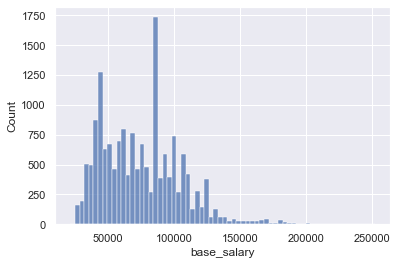

In [5]:
sns.histplot(data = df, x = "base_salary")

The base salaries are not normally distributed

<AxesSubplot: xlabel='base_salary'>

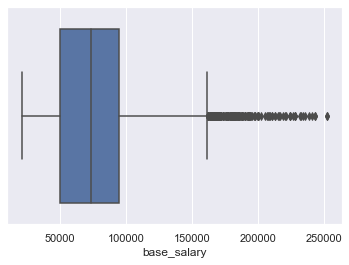

In [6]:
sns.boxplot(data = df, x = "base_salary")

There are a  lot of outliers on the high end of base salary

<AxesSubplot: xlabel='base_salary', ylabel='work_location_borough'>

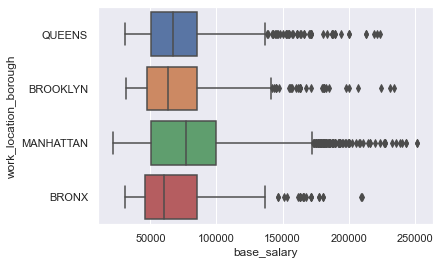

In [7]:
sns.boxplot(data = df, x = "base_salary", y = "work_location_borough")

Manhattan has the highest median but also the highest range and number of outliers
The Bronx has the least outliers.
Esclusing outliers Queens, Brooklyn and Bronx are pretty similar
Staten Island is not included for some reason

In [8]:
df.work_location_borough.value_counts()

MANHATTAN    11083
QUEENS        2367
BROOKLYN      2121
BRONX         1089
Name: work_location_borough, dtype: int64

Manhattan looks to be overrepresented in the data.

In [9]:
df[df["agency_name"] == "NYC FIRE PENSION FUND"]

,fiscal_year,payroll_number,agency_name,last_name,first_name,mid_init,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay
1240,2020,257,NYC FIRE PENSION FUND,DUNN,PATRICK,M,08/28/2017,MANHATTAN,EXECUTIVE DIRECTOR,ACTIVE,227786.0,per Annum,1820.0,224324.81,0.0,0.0,0.0


In [10]:
df.agency_name.value_counts()

# lots of agencies

# maybe use groupby

DEPT OF ED PEDAGOGICAL           5120
POLICE DEPARTMENT                2677
DEPT OF ED PARA PROFESSIONALS    1668
FIRE DEPARTMENT                   861
HRA/DEPT OF SOCIAL SERVICES       754
                                 ... 
BOARD OF CORRECTION                 1
BRONX COMMUNITY BOARD #6            1
CIVIL SERVICE COMMISSION            1
PUBLIC ADMINISTRATOR-BRONX          1
CITY CLERK                          1
Name: agency_name, Length: 87, dtype: int64

In [11]:
gbo= df.groupby("agency_name")

In [12]:
gbo["base_salary"].mean()

agency_name
ADMIN FOR CHILDREN'S SVCS       68875.882353
ADMIN TRIALS AND HEARINGS       57382.421053
BOARD OF CORRECTION             73305.000000
BOARD OF ELECTION               55018.659574
BOROUGH PRESIDENT-BRONX        112743.000000
                                   ...      
PUBLIC ADVOCATE                 83339.802500
QUEENS COMMUNITY BOARD #8      126801.000000
TAX COMMISSION                 129626.700000
TAXI & LIMOUSINE COMMISSION     61411.878788
TEACHERS RETIREMENT SYSTEM      85316.315789
Name: base_salary, Length: 87, dtype: float64

<AxesSubplot: ylabel='agency_name'>

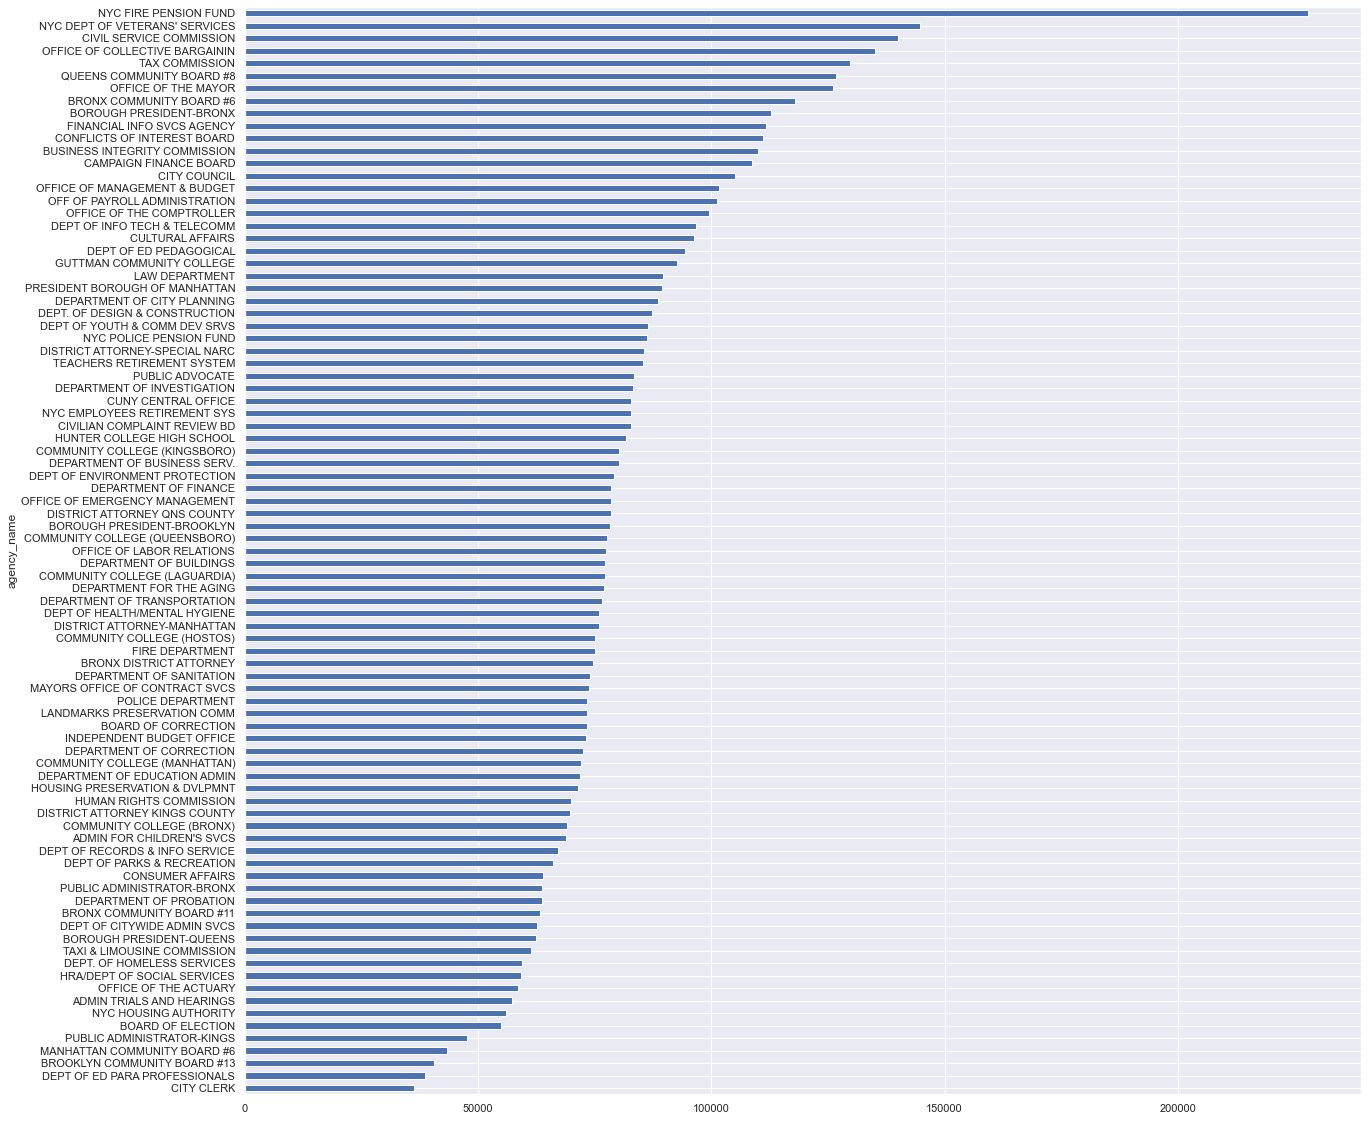

In [13]:
plt.figure(figsize=(20, 20))
#sns.barplot(data = df, y = "agency_name", x=df["base_salary"], estimator = np.mean)

# use matplotlib instead

gbo["base_salary"].mean().sort_values(ascending = True).plot(kind="barh", figsize=(20,20))

# can rewrite this so it looks nicer

# how to include the number of people with that agency?

# here changing fig size worked



These results would make you think working at the NYC Fire Pension Fund would be the best bet but that is wrong.

The Data set only has 1 entry of someone working there so the mean is the salary of the chairman.

I would say this is not a good chart to decide what agency is the best to work for

Something new/interesting about this data



In [14]:
gbo= df.groupby("title_description")

In [15]:
most_common = list(df.title_description.value_counts().index)

# maybe cut the jobs with less than 100 people?

# take the 50 most common jobs

In [16]:
most_common = most_common[:50]

In [17]:
#most_common

In [18]:
jobs_pay = []

for job in most_common:
    
    group = gbo.get_group(job)
    
    val = group["base_salary"].mean()
    
    jobs_pay.append(val)
    

In [19]:
#jobs_pay

In [20]:
zipped = list(zip( jobs_pay, most_common,))

In [21]:
#zipped.sort(reverse = True)

zipped.sort(reverse = False)

In [22]:
#zipped

In [23]:
# make a dataframe so we can sort easily

# maybe there is a better way to do this

newdf = pd.DataFrame(data = zipped,columns = [ "Average Pay", "Job"])

In [24]:
#newdf

<AxesSubplot: ylabel='Job'>

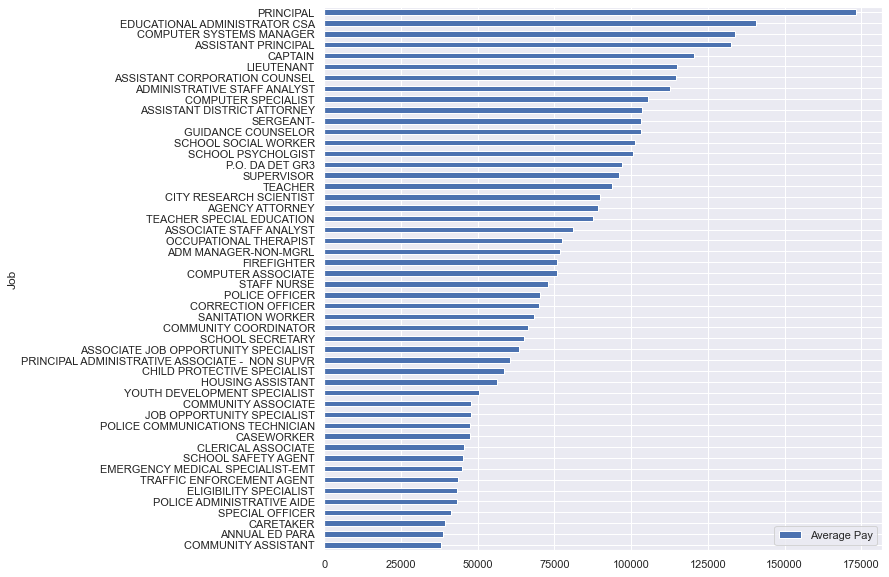

In [25]:
#plt.figure(figsize=(20, 20))

#sns.barplot(y = most_common, x = jobs_pay)



newdf.plot(kind="barh", y = "Average Pay", x = "Job", figsize=(10,10))





#newdf.plot(kind="barh", y = "Average Pay", x ="Job" )

# here are the average salaris of the 50 most common jobs

# maybe median would have been better to avoid outliers



# Using the BX-Police.csv data:
* create a time series chart illustrating their average base salary over time (by fiscal_year).  
* What trend does this show? 
* Why do you think the trend exists?


In [26]:
df = pd.read_csv("data/BX-Police.csv")

In [27]:
df.head()

,fiscal_year,payroll_number,agency_name,last_name,first_name,mid_init,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay
0,2019,56.0,POLICE DEPARTMENT,GUZMAN,ALBERTO,NaN,07/05/2017,BRONX,POLICE OFFICER,ACTIVE,45000.0,per Annum,2040.00,43541.17,243.83,8597.10,3710.14
1,2015,NaN,POLICE DEPARTMENT,DERASMO,MARIELENA,NaN,07/06/2010,BRONX,POLICE OFFICER,ACTIVE,56609.0,per Annum,2085.72,54578.49,335.83,13344.33,4387.03
2,2018,56.0,POLICE DEPARTMENT,GARCES,MICHAEL,A,01/09/2013,BRONX,POLICE OFFICER,ACTIVE,63125.0,per Annum,2045.72,62809.14,145.00,7349.27,9801.34
3,2017,NaN,POLICE DEPARTMENT,ROSSI,THOMAS,C,01/06/2016,BRONX,POLICE OFFICER,ACTIVE,46805.0,per Annum,2051.43,49411.14,121.00,4213.27,6490.72
4,2019,56.0,POLICE DEPARTMENT,GARRETT,DENISE,NaN,05/30/2001,BRONX,SCHOOL SAFETY AGENT,ACTIVE,46737.0,per Annum,2040.00,46608.91,0.00,0.00,1202.56


In [28]:
gbo= df.groupby("fiscal_year")

<AxesSubplot: xlabel='fiscal_year'>

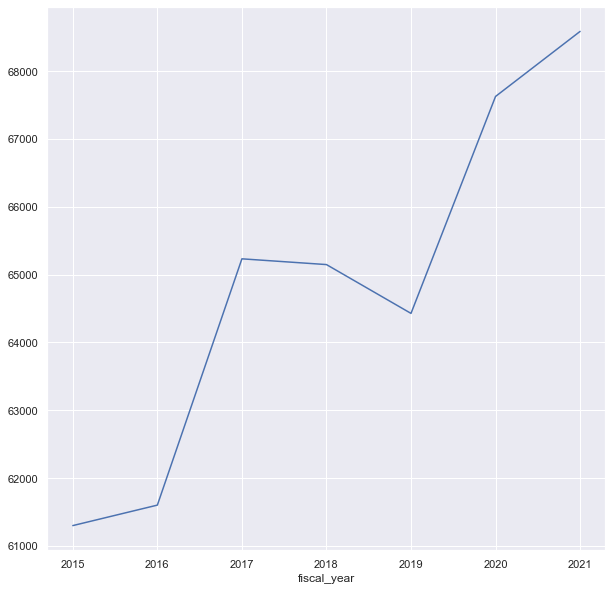

In [29]:
gbo["base_salary"].mean().plot(kind="line", figsize=(10,10))

# can rewrite so it looks nicer

The general trend is an increase which makes sense as salaries will increase due to inflation.
Not exactly sure why it went down bewtween 2017 to 2019

# Using Stocks.csv
* Tell me a story about the Google stock for the year. 
* Any story you'd like to tell. 


In [30]:
df = pd.read_csv("data/Stocks.csv")

In [31]:
df.Ticker.value_counts()
# data is only google

GOOG    252
Name: Ticker, dtype: int64

In [32]:
df.head()

,Date,Volume,High,Low,Open,Close,Adj Close,Ticker
0,2021-01-04,1901900,1760.650024,1707.849976,1757.540039,1728.239990,1728.239990,GOOG
1,2021-01-05,1145300,1747.670044,1718.015015,1725.000000,1740.920044,1740.920044,GOOG
2,2021-01-06,2602100,1748.000000,1699.000000,1702.630005,1735.290039,1735.290039,GOOG
3,2021-01-07,2265000,1788.400024,1737.050049,1740.060059,1787.250000,1787.250000,GOOG
4,2021-01-08,2050600,1809.839966,1773.535034,1787.979980,1807.209961,1807.209961,GOOG


In [33]:
df.info()
# should convert date to date time object probably

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Volume     252 non-null    int64  
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Open       252 non-null    float64
 5   Close      252 non-null    float64
 6   Adj Close  252 non-null    float64
 7   Ticker     252 non-null    object 
dtypes: float64(5), int64(1), object(2)
memory usage: 15.9+ KB


In [34]:
df["Dif"] = df["High"] - df["Low"]

In [35]:
df.head()

,Date,Volume,High,Low,Open,Close,Adj Close,Ticker,Dif
0,2021-01-04,1901900,1760.650024,1707.849976,1757.540039,1728.239990,1728.239990,GOOG,52.800048
1,2021-01-05,1145300,1747.670044,1718.015015,1725.000000,1740.920044,1740.920044,GOOG,29.655029
2,2021-01-06,2602100,1748.000000,1699.000000,1702.630005,1735.290039,1735.290039,GOOG,49.000000
3,2021-01-07,2265000,1788.400024,1737.050049,1740.060059,1787.250000,1787.250000,GOOG,51.349975
4,2021-01-08,2050600,1809.839966,1773.535034,1787.979980,1807.209961,1807.209961,GOOG,36.304932


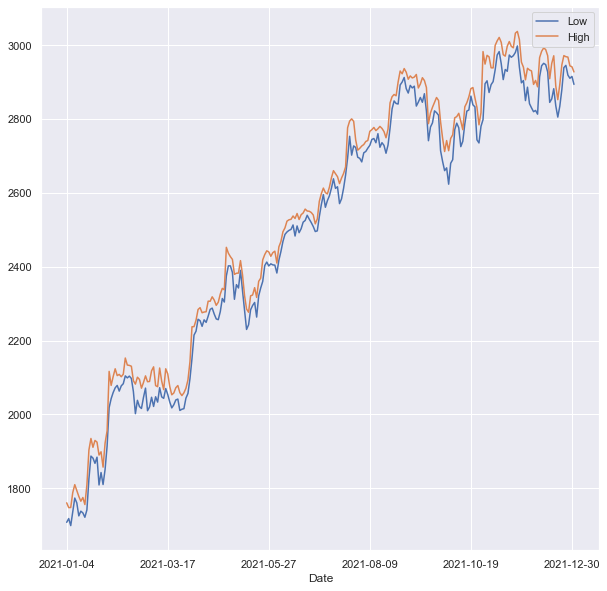

In [36]:
fig, ax = plt.subplots()

df.plot(kind="line", x = "Date", y = "Low", ax = ax, figsize=(10,10))
df.plot(kind="line", x = "Date", y = "High", ax = ax, figsize=(10,10))

plt.legend()
plt.show()

<AxesSubplot: xlabel='Date'>

<Figure size 1440x1080 with 0 Axes>

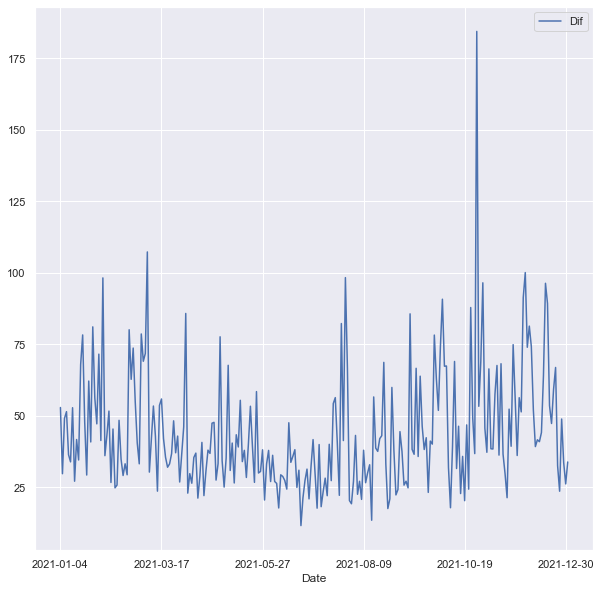

In [37]:

plt.figure(figsize=(20, 15))
df.plot(kind="line", x = "Date", y = "Dif", figsize=(10,10))


This shows us the change in google stock daily for the 2021 year

Alternating bwtween close and open would be interesting

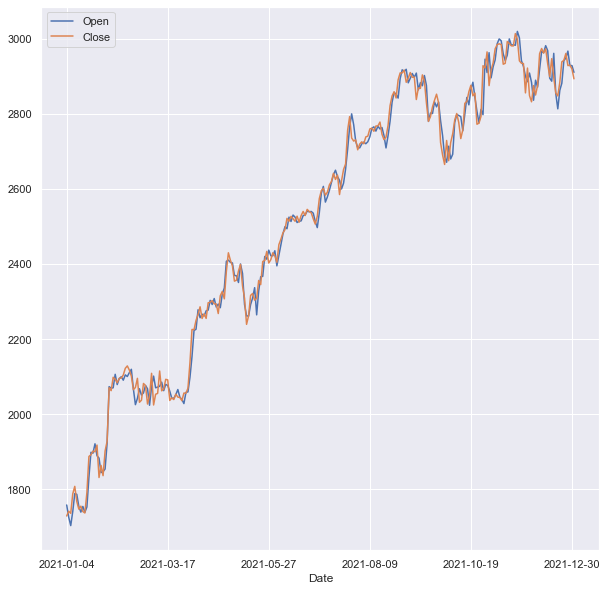

In [38]:
fig, ax = plt.subplots()

df.plot(kind="line", x = "Date", y = "Open", ax = ax, figsize=(10,10))
df.plot(kind="line", x = "Date", y = "Close", ax = ax, figsize=(10,10))

plt.legend()
plt.show()

# hard to read

# Using Sales.csv 
* make a time series chart that shows the sales for each item over the past 12 months.  
* What does this tell you about the items.  
* Which item would you recommend they push more of and which item/s would you recommend they stop selling?
* show what percentage of each item contributes to total sales. 


In [39]:
df = pd.read_csv("data/sales.csv")

In [40]:
df.head()

# need to get the totals for each item for all months into a dataframe

# maybe use a dictionary

# maybe change to
# month         item           sold

# then can groupby item

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer
0,1,2500,1500,5200,9200,1200,1500
1,2,2630,1200,5100,6100,2100,1200
2,3,2140,1340,4550,9550,3550,1340
3,4,3400,1130,5870,8870,1870,1130
4,5,3600,1740,4560,7760,1560,1740


In [41]:
df.shape

(12, 7)

In [42]:
columns = list(df.columns)

In [43]:
columns.remove("month_number")

In [44]:
columns

['facecream',
 'facewash',
 'toothpaste',
 'bathingsoap',
 'shampoo',
 'moisturizer']

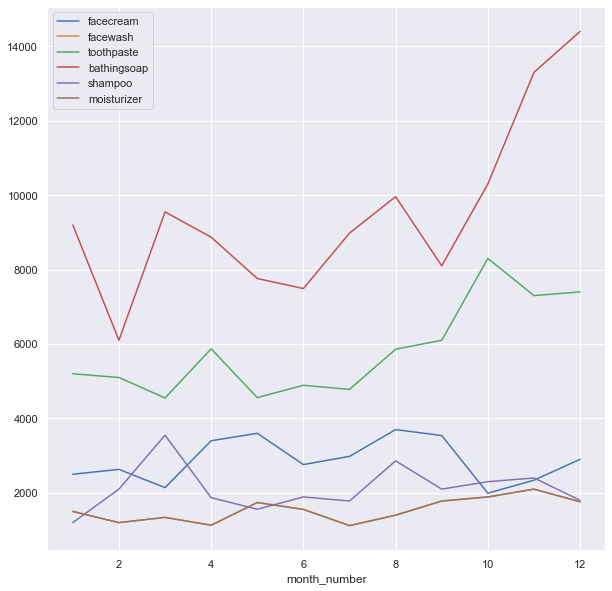

In [45]:
fig, ax = plt.subplots()

#df.plot(kind="line", x = "month_number", y = "facecream", ax = ax)
#df.plot(kind="line", x = "month_number", y = "facewash", ax = ax)

# try to make it easier to do

for item in columns:
    df.plot(kind="line", x = "month_number", y = item, ax = ax, figsize=(10,10))
    

plt.legend()
plt.show()

# would be nice to move the legend

Bathing soap is always the most bought item
Bathing soap sells a lot more near the end of the year
The rest are more or less stable

Toothpaste is their second best item and also goes up in the winter months

They should probably get more bathing soap to sell
They should probably stop selling moisturizer as it is their least performing product

It is however their most consistent product. so maybe it it low as they do  ot stock enough

In [46]:
values = []

for item in columns:
    
    values.append(df[item].sum())

([<matplotlib.patches.Wedge at 0x1fce5c781f0>,
 [Text(1.0191857113582774, 0.4138363030995739, 'facecream'),
  Text(0.6140655913722997, 0.912646398936953, 'facewash'),
  Text(-0.4252111998343268, 1.0144926986112084, 'toothpaste'),
  Text(-0.6978920809686103, -0.8502626907734472, 'bathingsoap'),
  Text(0.8424027164269658, -0.7073596421598204, 'shampoo'),
  Text(1.0764907254787095, -0.226202824823922, 'moisturizer')],
 [Text(0.5559194789226967, 0.22572889259976756, '12.2775'),
  Text(0.3349448680212543, 0.4978071266928834, '6.5927'),
  Text(-0.2319333817278146, 0.5533596537879318, '24.8932'),
  Text(-0.38066840780106015, -0.4637796495127893, '40.5961'),
  Text(0.459492390778345, -0.3858325320871747, '9.0479'),
  Text(0.5871767593520233, -0.12338335899486653, '6.5927')])

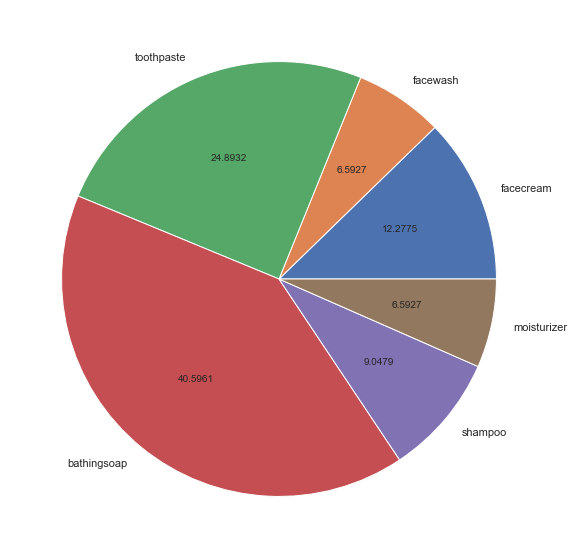

In [47]:
plt.figure(figsize=(10, 10))
plt.pie(x = values, labels = columns, autopct='%.4f')